<font size="+3.7" color="black"><b><center>Titanic Predictions</center></b></font><br>
<font color='black' size='+2'><b><center>June 2020</center></b></font>

<hr>

# Table of Contents:
* Step 1 - Import Libraries
    * We need to import the necessary libraries for many things
* Step 2 - Read Data 
    * Read in the train and test data 
    * Check data
* Step 3 - Data Visualization
    * Graph and visualize each column to see if there is a clear correlation or similarities
* Step 4 - Data Preparation 
    * For the columns with missing values impute them
    * Create new features 'Title' and 'FamSize'
    * Drop certain features which are not indicative or have too many missing values
* Step 5 - Modelling
    * Select features to keep
    * Split dataset back into train and test
    * Use GradientBoostingClassifier for our model
    * Use "accuracy_score" to print out score 
* Step 6 - Submission 
    * Submit to Competition
    
###### competition source: https://www.kaggle.com/c/titanic

<font size="+3" color="black"><b>1 - Import Libraries</b></font><br><a id="1"></a>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re
from collections import Counter
from statistics import mode
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

<font size="+3" color="black"><b>2 - Explore Data </b></font><br><a id="2"></a>

In this section we read in the data and check the data we are working with. As we check the data we can clearly see the data's dimensions and it's features.

Overview
The data has been split into two groups:

training set (train.csv)
test set (test.csv)
The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

<img src="data_definitions.png"/>

In [2]:
# Reading data
train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')

# Storing Passenger Id for submission
Id = test.PassengerId

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.shape

(891, 12)

In [6]:
test.shape

(418, 11)

In [7]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

<font size="+3" color="black"><b>3 - Data Visualization</b></font><br><a id="3"></a>

Lets view each feature with histograms

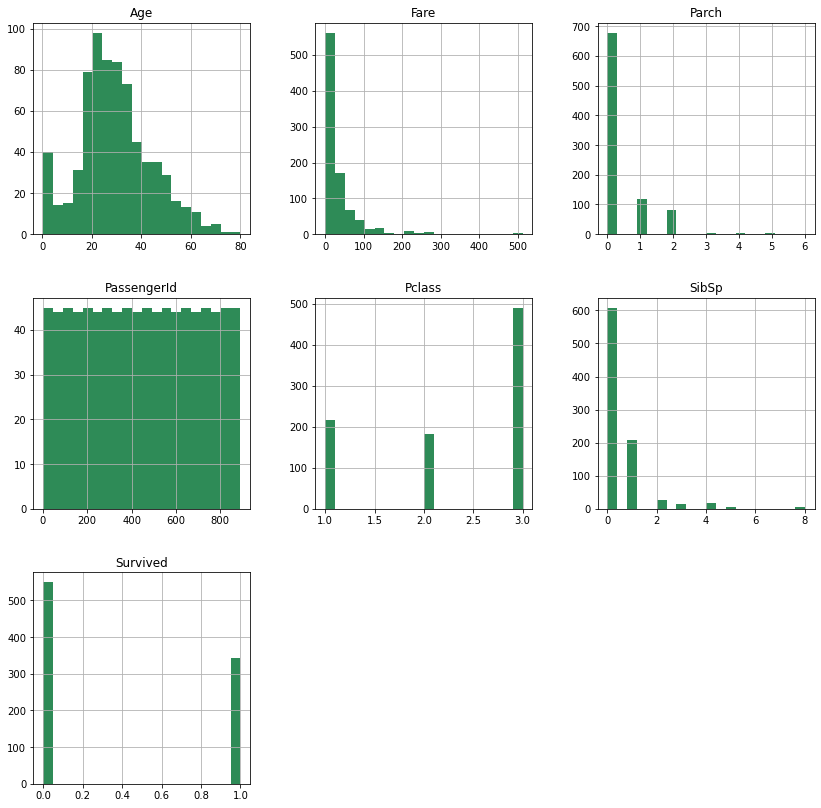

In [8]:
train.hist(figsize=(14,14), color='seagreen', bins=20)
plt.show()

In this section we view each feature's survival rate using barplots and factorplots. Using the visualizations we make assumptions and find correlations between different features.

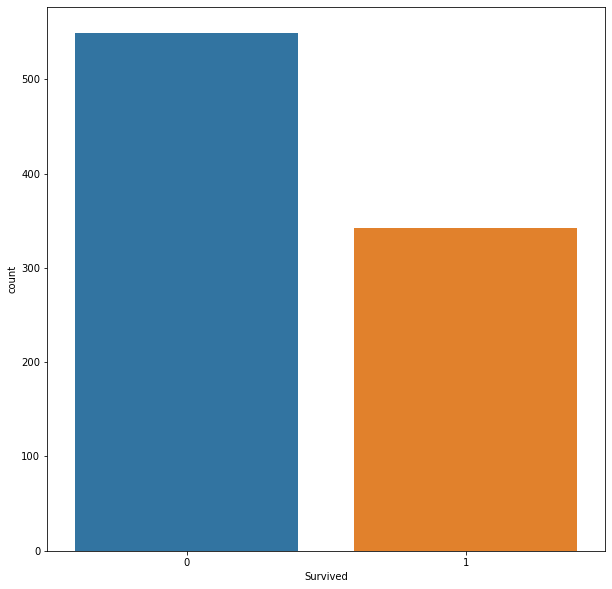

In [9]:
fig = plt.figure(figsize=(10,10))
sns.countplot(train['Survived'], data=train)

We can see that overall most passengers didn't survive

### 3.1 Gender Visualization

Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


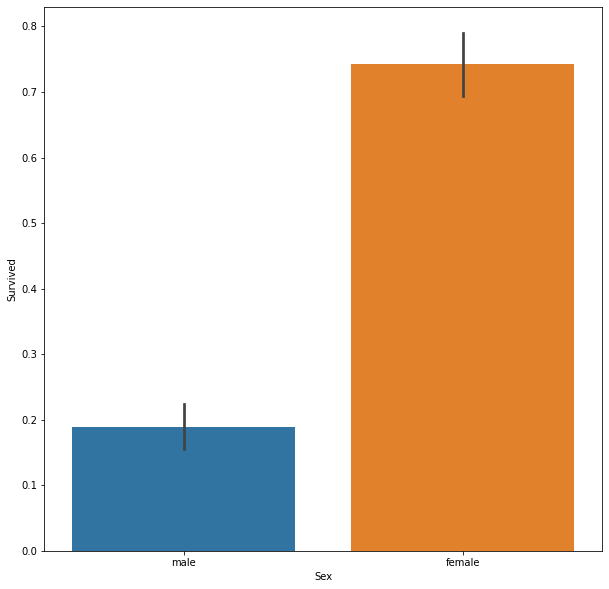

In [10]:
fig = plt.figure(figsize=(10,10))

sns.barplot(x="Sex", y="Survived", data=train)

#print percentages of females vs. males that survive
print("Percentage of females who survived:", train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Percentage of males who survived:", train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

- Females have a much higher chance of Survival than men

### 3.2 Pclass Visualization

Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847


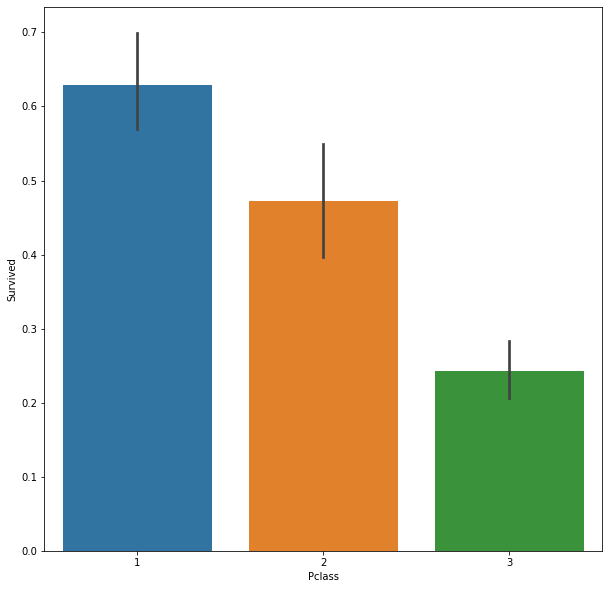

In [11]:
fig = plt.figure(figsize=(10,10))


#draw a bar plot of survival by Pclass
sns.barplot(x="Pclass", y="Survived", data=train)

#print percentage of people by Pclass that survived
print("Percentage of Pclass = 1 who survived:", train["Survived"][train["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 2 who survived:", train["Survived"][train["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 3 who survived:", train["Survived"][train["Pclass"] == 3].value_counts(normalize = True)[1]*100)

- People who had a better class were more likely to Survive

### 3.3 SibSp Visualization

Percentage of SibSp = 0 who survived: 34.53947368421053
Percentage of SibSp = 1 who survived: 53.588516746411486
Percentage of SibSp = 2 who survived: 46.42857142857143


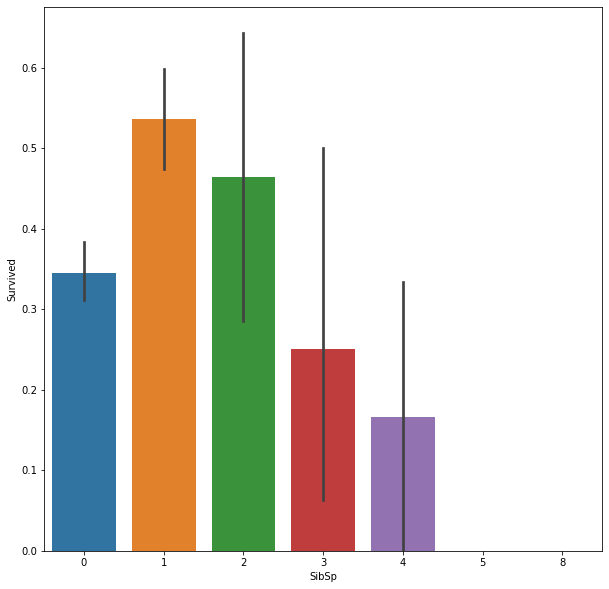

In [12]:
fig = plt.figure(figsize=(10,10))


#draw a bar plot for SibSp vs. survival
sns.barplot(x="SibSp", y="Survived", data=train)

#I won't be printing individual percent values for all of these.
print("Percentage of SibSp = 0 who survived:", train["Survived"][train["SibSp"] == 0].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 1 who survived:", train["Survived"][train["SibSp"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 2 who survived:", train["Survived"][train["SibSp"] == 2].value_counts(normalize = True)[1]*100)

- There isn't a clear correlation but in general people with more siblings/spouses were less likely survive. Also people with no siblings/spouses were less likely to survive than people with one or two siblings/spouses.

### 3.4 Parch Visualization

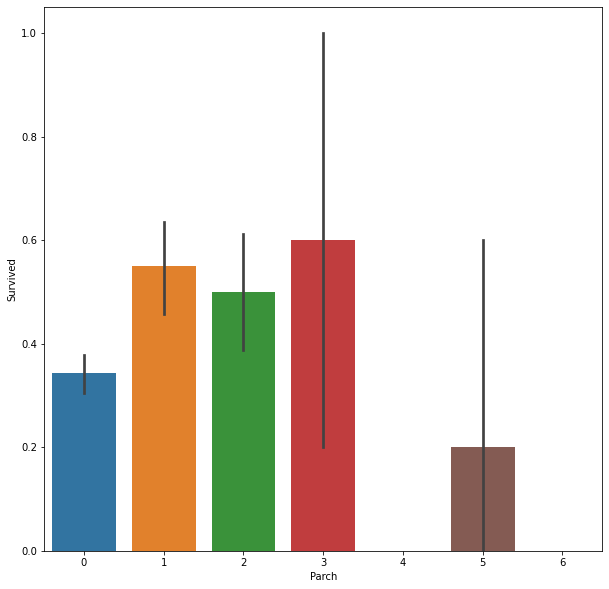

In [13]:
fig = plt.figure(figsize=(10,10))


sns.barplot(x="Parch", y="Survived", data=train)
plt.show()

- Again, no clear correlation but people with no parents were less likely to survive than those with 1-3 parents/children.

<font size="+3" color="black"><b>4 - Data Preparation</b></font><br><a id="4"></a>

We find correlations between features and impute missing values using the correlations. For categorical features we map the feature so it becomes a numerical feature. Using Feature Engineering we are able to create new features 'Title' and 'FamSize' which will overall improve our model performance.

In [14]:
dataset = pd.concat([train, test], sort=False, ignore_index=True)

In [15]:
dataset.isnull().mean().sort_values(ascending=False)

Cabin          0.774637
Survived       0.319328
Age            0.200917
Embarked       0.001528
Fare           0.000764
Ticket         0.000000
Parch          0.000000
SibSp          0.000000
Sex            0.000000
Name           0.000000
Pclass         0.000000
PassengerId    0.000000
dtype: float64

#### Observations for Imputing Missing Values:
- Cabin is missing 77.4%  of its values. We will remove this column
- Age is missing about 20% of its values. These are imputable therefore we probably will keep this column.
- Embarked and Fare are missing less than 1% of their values. We are definitely keeping these columns.

*imputable: capable of being assigned

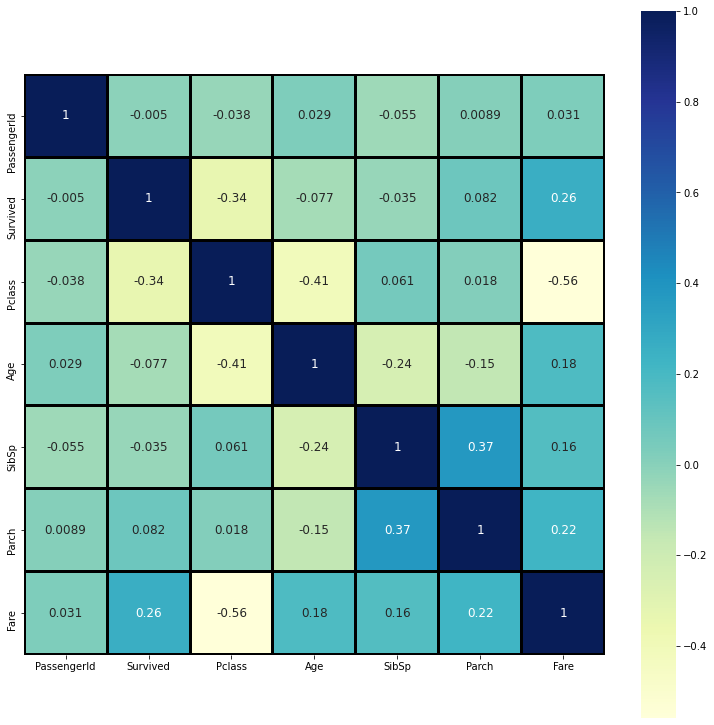

In [16]:
# Checking correlations with Heatmap

fig, axs = plt.subplots(nrows=1, figsize=(13, 13))
sns.heatmap(dataset.corr(), annot=True, square=True, cmap='YlGnBu', linewidths=2, linecolor='black', annot_kws={'size':12})

### 4.1 Fare Feature

In [18]:
#filling in missing data with mean value
dataset['Fare'].fillna(dataset['Fare'].mean(), inplace=True)


### 4.2 Embarked Feature

We fill in Embarked feature's missing value with the mode which is the value 'S'

In [19]:
dataset['Embarked'] = dataset['Embarked'].fillna('S')

### 4.3 Title Feature

- We are basically creating a new column 'Title' and extracting the Title from the 'Name' column
- Feature engineering

In [23]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [24]:
dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)
dataset['Title'].unique().tolist()

['Mr',
 'Mrs',
 'Miss',
 'Master',
 'Don',
 'Rev',
 'Dr',
 'Mme',
 'Ms',
 'Major',
 'Lady',
 'Sir',
 'Mlle',
 'Col',
 'Capt',
 'Countess',
 'Jonkheer',
 'Dona']

In [25]:
# This shows the percentage of occurrences for each title. 'Mr' occurs the most often.

dataset['Title'].value_counts(normalize=True)*100

Mr          57.830405
Miss        19.862490
Mrs         15.049656
Master       4.660046
Dr           0.611154
Rev          0.611154
Col          0.305577
Major        0.152788
Mlle         0.152788
Ms           0.152788
Jonkheer     0.076394
Dona         0.076394
Sir          0.076394
Lady         0.076394
Don          0.076394
Capt         0.076394
Mme          0.076394
Countess     0.076394
Name: Title, dtype: float64

- Some of the titles above are quite unfamiliar, so we decide to replace these titles with more familiar titles which organizes our categories. After replacing these titles we only end up with 5 distinct titles.

In [26]:
dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

dataset['Title'] = dataset['Title'].map(title_mapping)

# Imputing missing values with 0
dataset['Title'] = dataset['Title'].fillna(0)

In [27]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


### 4.4 Age Feature

- We are planning to impute missing values in the column 'Age'. 'Pclass' and 'Sex' are correlated to 'Age', so we group them with 'Age' to find the median.
- We then categorize age because there is a correlation between age and survival. 

Credit: https://www.kaggle.com/vincentdion/reach-0-80-as-a-noob

In [28]:
# Filling the missing values in Age with the medians of Sex and Pclass groups
dataset['Age'].fillna(dataset['Age'].mean(), inplace=True)

### 4.5 Ticket Feature

In [29]:
dataset.drop(['Ticket'], axis=1, inplace=True)

- 'Ticket' is a pretty useless feature so we decide to drop it

### 4.6 Sex Feature

- 'Sex' is a categorical feature, therefore we will Label-Encode it later on

### 4.7 Name Feature

- We already used the 'Name' feature for making the 'Title' column, so we do not need it anymore.

In [30]:
dataset.drop(['Name'], axis=1, inplace=True)

### 4.8 Cabin Feature

- Too many missing values, will drop this feature

In [31]:
dataset.drop(['Cabin'], axis=1, inplace=True)

### 4.9 Family Size Feature (Created)

- Columns 'SibSp' and 'Parch' are very similar to each other in meaning and in correlation. 

In [32]:
dataset['SibSp'].corr(dataset['Parch'])

0.37358719062649304

In [33]:
dataset['Parch'].corr(dataset['SibSp'])

0.37358719062649304

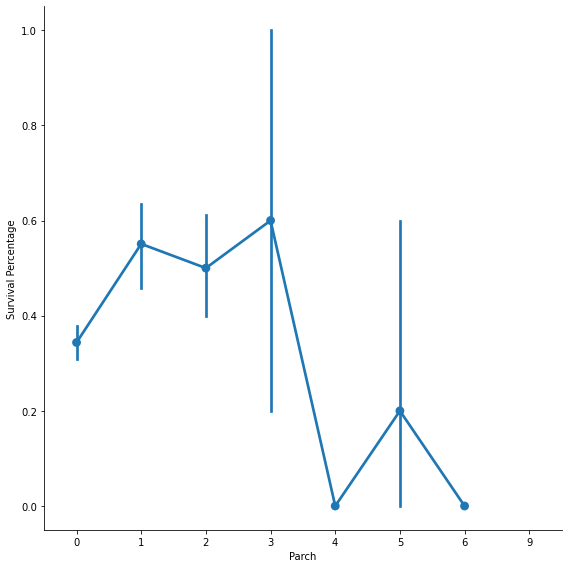

In [34]:
g  = sns.factorplot(x="Parch",y="Survived",data=dataset, size = 8)
g = g.set_ylabels("Survival Percentage")

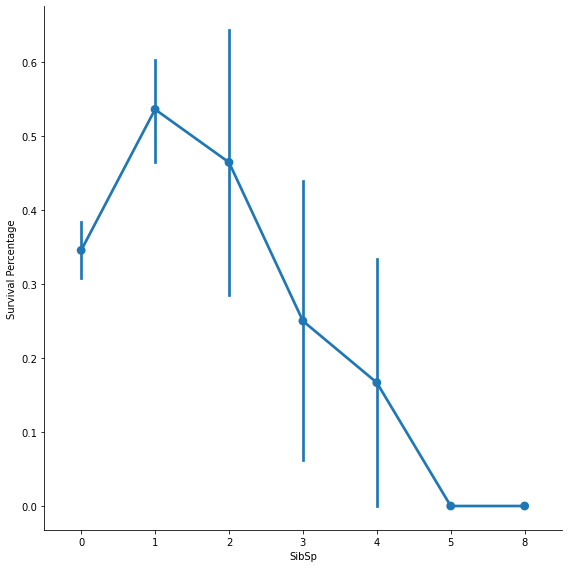

In [35]:
g  = sns.factorplot(x="SibSp",y="Survived",data=dataset, size = 8)
g = g.set_ylabels("Survival Percentage")

- According to their factorplots, they are both relatively weak features alone
- They are highly correlated to each other so we decide to combine them for a feature representing Family Size

In [36]:
# Family Size = # of Siblings + # of Parents + You
dataset['FamSize'] = dataset['SibSp'] + dataset['Parch'] + 1

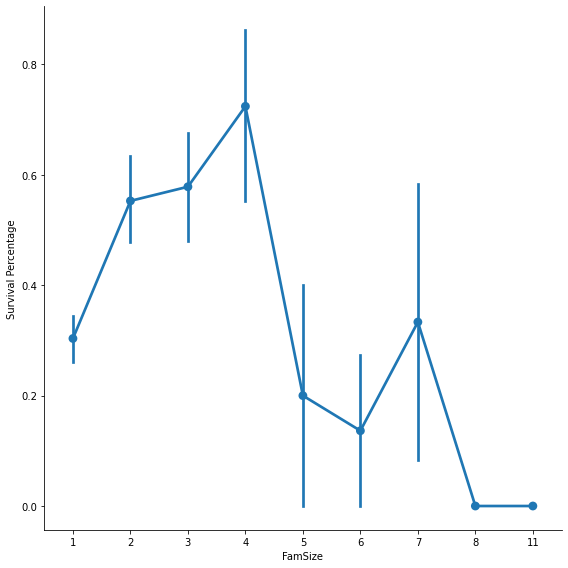

In [37]:
g  = sns.factorplot(x="FamSize",y="Survived",data=dataset, size = 8)
g = g.set_ylabels("Survival Percentage")

<font size="+3" color="black"><b>5 - Modeling</b></font><br><a id="5"></a>

In [38]:
dataset.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
Title            0
FamSize          0
dtype: int64

In [39]:
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamSize
0,1,0.0,3,male,22.0,1,0,7.2500,S,1,2
1,2,1.0,1,female,38.0,1,0,71.2833,C,3,2
2,3,1.0,3,female,26.0,0,0,7.9250,S,2,1
3,4,1.0,1,female,35.0,1,0,53.1000,S,3,2
4,5,0.0,3,male,35.0,0,0,8.0500,S,1,1


In [40]:
label = LabelEncoder()

In [41]:
for col in ['Sex', 'Embarked']:
    dataset[col] = label.fit_transform(dataset[col])

In [42]:
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamSize
0,1,0.0,3,1,22.0,1,0,7.2500,2,1,2
1,2,1.0,1,0,38.0,1,0,71.2833,0,3,2
2,3,1.0,3,0,26.0,0,0,7.9250,2,2,1
3,4,1.0,1,0,35.0,1,0,53.1000,2,3,2
4,5,0.0,3,1,35.0,0,0,8.0500,2,1,1


- Split dataset back into train and test variables.

In [43]:
# Splitting dataset into train
train = dataset[:len(train)]

# Splitting dataset into test
test = dataset[len(train):]

# Drop labels 'Survived' because there shouldn't be a Survived column in the test data
test.drop(labels=['Survived'], axis=1, inplace=True)

In [44]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamSize
0,1,0.0,3,1,22.0,1,0,7.2500,2,1,2
1,2,1.0,1,0,38.0,1,0,71.2833,0,3,2
2,3,1.0,3,0,26.0,0,0,7.9250,2,2,1
3,4,1.0,1,0,35.0,1,0,53.1000,2,3,2
4,5,0.0,3,1,35.0,0,0,8.0500,2,1,1


In [45]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamSize
891,892,3,1,34.5,0,0,7.8292,1,1,1
892,893,3,0,47.0,1,0,7.0000,2,3,2
893,894,2,1,62.0,0,0,9.6875,1,1,1
894,895,3,1,27.0,0,0,8.6625,2,1,1
895,896,3,0,22.0,1,1,12.2875,2,3,3


- We see that Survived is a 'float' type, so we must change it to an 'int' type.

In [46]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamSize
0,1,0.0,3,1,22.0,1,0,7.2500,2,1,2
1,2,1.0,1,0,38.0,1,0,71.2833,0,3,2
2,3,1.0,3,0,26.0,0,0,7.9250,2,2,1
3,4,1.0,1,0,35.0,1,0,53.1000,2,3,2
4,5,0.0,3,1,35.0,0,0,8.0500,2,1,1


In [47]:
train['Survived'] = train['Survived'].astype(int)

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

y=train.Survived
X=train.drop('Survived', axis=1)


In [49]:
cross_val_score(LogisticRegression(), X, y).mean()

0.7879354717218002

In [50]:
cross_val_score(SVC(), X, y).mean()

0.6397589605172306

In [51]:
cross_val_score(RandomForestClassifier(), X, y).mean()

0.7980854936915447

In [52]:
cross_val_score(GaussianNB(), X, y).mean()

0.7991212102190698

In [53]:
cross_val_score(DecisionTreeClassifier(), X, y).mean()

0.7364886071181973

In [54]:
cross_val_score(GradientBoostingClassifier(), X, y).mean()

0.7835791852363319

In [56]:
# Using train_test_split we split the data into train and validation data for testing
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 2)

We now use GradientBoostingClassifier for training and predictions

In [57]:
# Our final model
final_model = RandomForestClassifier(bootstrap=True, ccp_alpha=0, class_weight=None,
                       criterion='gini', max_depth=12, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)



# Train final_model with train data
final_model.fit(X_train, y_train)

# Predict final_model
predictions = final_model.predict(X_val)

# Print out score
print('Accuracy: ', accuracy_score(predictions, y_val))

Accuracy:  0.7932960893854749


<font size="+3" color="green"><b>6 - Submission</b></font><br><a id="6"></a>

Submission to the contest

In [58]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamSize
891,892,3,1,34.5,0,0,7.8292,1,1,1
892,893,3,0,47.0,1,0,7.0000,2,3,2
893,894,2,1,62.0,0,0,9.6875,1,1,1
894,895,3,1,27.0,0,0,8.6625,2,1,1
895,896,3,0,22.0,1,1,12.2875,2,3,3


In [59]:
final_predictions = final_model.predict(test)

output = pd.DataFrame({'PassengerId': Id, 'Survived':final_predictions})
output.to_csv('submission.csv', index=False)

In [60]:
output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
